## Part 2: Implementation using numpy

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
def mse(y_pred, y_true):
    m = len(y_true)
    return np.sum((y_pred - y_true)  ** 2) / (2*m)

In [85]:
def gradient_descent(X, y, alpha, epochs):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0.0
    cost_history = []

    for epoch in range(epochs):
        y_pred = X.dot(weights) + bias
        error = y_pred - y

        dw = (1/m) * (X.T.dot(error))
        db = (1/m) * (np.sum(error))

        weights = weights - alpha*dw
        bias = bias - alpha*db

        cost = mse(y_pred, y)
        cost_history.append(cost)

        # if epoch > 0 and abs(cost_history[-2] - cost_history[-1]) < 1e-6:
        #     break

    return weights, bias, cost_history

Noticed that early capping makes training time much less, with no practical impact on other scores

In [86]:
# def min_max_scale_X(X):
#     if hasattr(X, 'astype'):
#         X_numeric = X.astype(float)
#     else:
#         X_numeric = np.array(X, dtype=float)
    
#     X_min = np.min(X_numeric, axis=0)
#     X_max = np.max(X_numeric, axis=0)
#     X_range = X_max - X_min
#     X_range[X_range == 0] = 1.0
#     X_scaled = (X_numeric - X_min) / X_range
#     return X_scaled, X_min, X_range

# def min_max_scale_y(y):
#     y_min = np.min(y)
#     y_max = np.max(y)
#     y_range = y_max - y_min
#     if y_range == 0:
#         y_range = 1.0
#     y_scaled = (y - y_min) / y_range
#     return y_scaled, y_min, y_range

# def predict(X, weights, bias, y_min, y_range):
#     y_scaled_pred = X.dot(weights) + bias
#     predictions = y_scaled_pred * y_range + y_min
#     return predictions

In [87]:
def standardize_X(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    stds[stds == 0] = 1.0 
    X_std = (X - means) / stds
    return X_std, means, stds

def standardize_y(y):
    mean = np.mean(y)
    std_dev = np.std(y)
    std_dev = std_dev if std_dev > 0 else 1.0
    y_std = (y - mean) / std_dev
    return y_std, mean, std_dev
    
def predict(X, weights, bias, y_mean, y_std):
    y_std_pred = X.dot(weights) + bias
    predictions = y_std_pred * y_std + y_mean
    return predictions

Observation: almost similar results with min-max scaling and standardisation

In [88]:
import pandas as pd
housing = pd.read_csv('california_prepared.csv')

# Shuffle the indexes to prevent biasing
housing = housing.sample(frac=1, random_state=42).reset_index(drop=True)

X = housing.drop('median_house_value', axis=1)  # All columns except the target
y = housing['median_house_value']               # Only the target column

In [89]:
def mae(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true))

def rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))

def r2_score(y_pred, y_true):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [90]:
def plot_loss(cost_history):
    plt.plot(cost_history)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title("Training Loss Curve for Numpy Implementation")
    plt.grid(True)
    plt.show()

Training Time: 9.023084163665771
Final Cost: 0.18476199654246375
Final Weights: Unnamed: 0                    0.073399
housing_median_age            0.183362
median_income                 0.667056
log_total_rooms               0.069642
rooms_per_household           0.025997
room_per_bedroom             -0.112042
region_0                      0.058218
region_1                     -0.010935
region_2                     -0.048606
region_3                     -0.008791
region_4                     -0.007419
region_5                     -0.075385
region_6                     -0.059600
region_7                      0.048075
ocean_proximity_<1H OCEAN     0.045895
ocean_proximity_INLAND       -0.175502
ocean_proximity_ISLAND        0.023622
ocean_proximity_NEAR BAY      0.062062
ocean_proximity_NEAR OCEAN    0.116537
age_mid_old                   0.030659
age_new                       0.033857
age_very_old                 -0.048681
dtype: float64
Final Bias: 0.0005069900098498269
Training MAE:

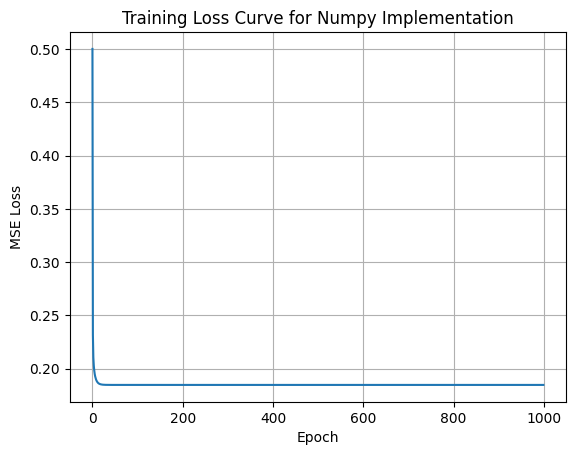

In [92]:
import time

def model():

    X_std, means, stds = standardize_X(X)
    
    train_size = int(0.8 * len(X))
    
    X_train = X_std[:train_size]
    X_test = X_std[train_size:]
    
    y_train_raw = y[:train_size]
    y_test_raw = y[train_size:]
    
    y_train, y_mean, y_std_dev = standardize_y(y_train_raw)

    start_time = time.time()
    weights, bias, cost_history = gradient_descent(X_train, y_train, alpha=0.5, epochs=1000)
    end_time = time.time()
    
    print("Training Time:", end_time - start_time)
    print("Final Cost:", cost_history[-1])
    print("Final Weights:", weights)
    print("Final Bias:", bias)

    predictions_train = predict(X_train, weights, bias, y_mean, y_std_dev)
    predictions_test = predict(X_test, weights, bias, y_mean, y_std_dev)

    print("Training MAE:", mae(predictions_train, y_train_raw))
    print("Training RMSE:", rmse(predictions_train, y_train_raw))
    print("Training R2 Score:", r2_score(predictions_train, y_train_raw))

    print("Testing MAE:", mae(predictions_test, y_test_raw))
    print("Testing RMSE:", rmse(predictions_test, y_test_raw))
    print("Testing R2 Score:", r2_score(predictions_test, y_test_raw))
    
    plot_loss(cost_history)
    
model()